In [1]:
import openmeteo_requests
import matplotlib.pyplot as plt
import requests_cache
import pandas as pd
import numpy as np
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from retry_requests import retry


In [61]:
def call_open_meteo_max(selected_station, start, end):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)

    # Initialize an empty list to store daily data
    daily_data = []

    # Define the start and end dates for the loop
    start_date = pd.Timestamp(start)
    end_date = pd.Timestamp(end)

    # Iterate through each day of December
    while start_date <= end_date:
        # Define the parameters for the API call
        params = {
            "latitude": selected_station["lat"],
            "longitude": selected_station["lon"],
            "start_date": start_date.strftime("%Y-%m-%d"),
            "end_date": start_date.strftime("%Y-%m-%d"),  # Use the same start and end date for daily data
            "daily": "wind_speed_10m_max",
            "timezone": "Europe/Berlin",
        }

        # Make the API call
        responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)

        for response in responses:
            # Process daily data. The order of variables needs to be the same as requested.
            daily = response.Daily()
            daily_wind_speed_10m_max = daily.Variables(0).ValuesAsNumpy()

            # Calculate the average wind speed for the day
            max_wind_speed = daily_wind_speed_10m_max.max()

            # Append the average wind speed for the day to daily_data
            daily_data.append({
                "date": start_date.strftime('%d.%m'),  # Format date to include year, month, and day
                "wind_speed_10m_max": max_wind_speed,  # Use the average wind speed
            })

        # Move to the next day
        start_date += pd.Timedelta(days=1)

    # Create a DataFrame from daily data
    daily_dataframe = pd.DataFrame(daily_data)
    
    # Calculate daily averages
    daily_max = daily_dataframe.groupby('date').max()
    return daily_max

In [63]:
def call_open_meteo_temp(selected_station, start, end):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)

    # Initialize an empty list to store daily data
    daily_data = []

    # Define the start and end dates for the loop
    start_date = pd.Timestamp(start)
    end_date = pd.Timestamp(end)

    # Iterate through each day of December
    while start_date <= end_date:
        # Define the parameters for the API call
        params = {
            "latitude": selected_station["lat"],
            "longitude": selected_station["lon"],
            "start_date": start_date.strftime("%Y-%m-%d"),
            "end_date": start_date.strftime("%Y-%m-%d"),  # Use the same start and end date for daily data
            "daily": "temperature_2m_mean",
            "timezone": "Europe/Berlin",
        }

        # Make the API call
        responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)

        for response in responses:
            # Process daily data. The order of variables needs to be the same as requested.
            daily = response.Daily()
            daily_temp_mean = daily.Variables(0).ValuesAsNumpy()

            # Calculate the average wind speed for the day
            avg_wind_speed = daily_temp_mean.mean()

            # Append the average wind speed for the day to daily_data
            daily_data.append({
                "date": start_date.strftime('%d.%m'),  # Format date to include year, month, and day
                "temperature_2m_mean": avg_wind_speed,  # Use the average wind speed
            })

        # Move to the next day
        start_date += pd.Timedelta(days=1)

    # Create a DataFrame from daily data
    daily_dataframe = pd.DataFrame(daily_data)
    
    # Calculate daily averages
    daily_avg = daily_dataframe.groupby('date').mean()
    return daily_avg

In [4]:
def plot_Lothar(Wind_lothar, Ortschaft):
    data = pd.concat([Wind_lothar], axis=1)
    data.columns = ['Orkan Lothar']
    # Plot
    ax = data.plot(kind='line', figsize=(30, 6), linewidth=5, color='red')
    # Beschriftungen und Anpassungen
    plt.xlabel('Tag')
    plt.ylabel('Windgeschwindigkeit in m/s')
    plt.title(f'Lothars Windgeschwindigkeit in {Ortschaft}', fontsize=14, fontweight='bold')
    plt.grid(False)
    plt.legend([])
    # Plot-Begrenzungen oben und rechts entfernen
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

Plots anzeige Definition

In [52]:
start = "1999-12-20"
end = "1999-12-31"
def Ortschaft(Ortschaft, Ort):
    plot_Lothar(call_open_meteo_max(Ortschaft, start, end), Ort)

Deutschland

In [ ]:
Berlin={'lat': 52.5200, 'lon': 13.4050}
Frankfurt = {'lat': 50.110924, 'lon': 8.682127}
München = {'lat': 48.1351, 'lon': 11.5820}
Stuttgart = {'lat': 48.7758, 'lon': 9.1829}
Nürnberg = {'lat': 49.4521, 'lon': 11.0767}
Köln = {'lat': 50.9375, 'lon': 6.9603}
Bielefeld = {'lat': 52.0302, 'lon': 8.5325}
Hamburg = {'lat': 53.5511, 'lon': 9.9937}
Dresden = {'lat': 51.0504, 'lon': 13.7373}

Ortschaft(Berlin, "Berlin")
Ortschaft(Frankfurt, "Frankfurt")
Ortschaft(München, "München")
Ortschaft(Stuttgart, "Stuttgart")
Ortschaft(Nürnberg, "Nürnberg")
Ortschaft(Köln, "Köln")
Ortschaft(Bielefeld, "Bielefeld")
Ortschaft(Hamburg, "Hamburg")
Ortschaft(Dresden, "Dresden")

Frankreich

In [ ]:
Caen = {'lat': 49.1829, 'lon': -0.3707}
Le_Havre = {'lat': 49.4938, 'lon': 0.1077}
Paris = {'lat': 48.8566, 'lon': 2.3522}
Le_Mans = {'lat': 48.0061, 'lon': 0.1996}
Nantes = {'lat': 47.2184, 'lon': -1.5536}
Montpellier = {'lat': 43.6109, 'lon': 3.8772}
Lyon = {'lat': 45.7578, 'lon': 4.8320}
Nancy = {'lat': 48.6921, 'lon': 6.1844}
Reims = {'lat': 49.2583, 'lon': 4.0317}
Lille = {'lat': 50.6292, 'lon': 3.0573}

Ortschaft(Caen, "Caen")
Ortschaft(Le_Havre, "Le Havre")
Ortschaft(Paris, "Paris")
Ortschaft(Le_Mans, "Le Mans")
Ortschaft(Nantes, "Nantes")
Ortschaft(Montpellier, "Montpellier")
Ortschaft(Lyon, "Lyon")
Ortschaft(Nancy, "Nancy")
Ortschaft(Reims, "Reims")
Ortschaft(Lille, "Lille")

Luxemburg

In [ ]:
Luxemburg = {'lat': 49.6116, 'lon': 6.1319}

Ortschaft(Luxemburg, "Luxemburg")

Belgien

In [ ]:
Lüttich = {'lat': 50.6326, 'lon': 5.5797}
Brüssel = {'lat': 50.8503, 'lon': 4.3517}
Antwerpen = {'lat': 51.2194, 'lon': 4.4025}

Ortschaft(Lüttich, "Lüttich")
Ortschaft(Brüssel, "Brüssel")
Ortschaft(Antwerpen, "Antwerpen")

Schweiz

In [ ]:
Genf = {'lat': 46.2044, 'lon': 6.1432}
Bern = {'lat': 46.9480, 'lon': 7.4474}
Basel = {'lat': 47.5596, 'lon': 7.5886}
Zürich = {'lat': 47.3769, 'lon': 8.5417}
Chur = {'lat': 46.8500, 'lon': 9.5333}

Ortschaft(Genf, "Genf")
Ortschaft(Bern, "Bern")
Ortschaft(Basel, "Basel")
Ortschaft(Zürich, "Zürich")
Ortschaft(Chur, "Chur")

Nord Italien

In [ ]:
Mailand = {'lat': 45.4642, 'lon': 9.1900}
Venedig = {'lat': 45.4408, 'lon': 12.3155}
Bologna = {'lat': 44.4949, 'lon': 11.3426}
Florenz = {'lat': 43.7696, 'lon': 11.2558}
Rom = {'lat': 41.9028, 'lon': 12.4964}
San_Marino = {'lat': 43.9424, 'lon': 12.4578}

Ortschaft(Mailand, "Mailand")
Ortschaft(Venedig, "Venedig")
Ortschaft(Bologna, "Bologna")
Ortschaft(Florenz, "Florenz")
Ortschaft(Rom, "Rom")
Ortschaft(San_Marino, "San_Marino")

West- Österreich

In [ ]:
Bregenz = {'lat': 47.5049, 'lon': 9.7474}
Innsbruck = {'lat': 47.2692, 'lon': 11.4041}
Salzburg = {'lat': 47.8095, 'lon': 13.0550}
Villach = {'lat': 46.6103, 'lon': 13.8554}

Ortschaft(Bregenz, "Bregenz")
Ortschaft(Innsbruck, "Innsbruck")
Ortschaft(Salzburg, "Salzburg")
Ortschaft(Villach, "Villach")

Tschechien

In [ ]:
Pilsen = {'lat': 49.7391, 'lon': 13.3736}
Liberec = {'lat': 50.7671, 'lon': 15.0569}
Prag = {'lat': 50.0755, 'lon': 14.4378}
Budweis = {'lat': 48.9745, 'lon': 14.4745}
Brünn = {'lat': 49.1951, 'lon': 16.6068}
Ostrava = {'lat': 49.8209, 'lon': 18.2625}

Ortschaft(Pilsen, "Pilsen")
Ortschaft(Liberec, "Liberec")
Ortschaft(Prag, "Prag")
Ortschaft(Budweis, "Budweis")
Ortschaft(Brünn, "Brünn")
Ortschaft(Ostrava, "Ostrava")

Niederlande

In [ ]:
Rotterdam = {'lat': 51.9225, 'lon': 4.4792}
Amsterdam = {'lat': 52.3676, 'lon': 4.9041}
Groningen = {'lat': 53.2194, 'lon': 6.5665}
Eindhoven = {'lat': 51.4416, 'lon': 5.4697}

Ortschaft(Rotterdam, "Rotterdam")
Ortschaft(Amsterdam, "Amsterdam")
Ortschaft(Groningen, "Groningen")
Ortschaft(Eindhoven, "Eindhoven")

Dänemark

In [ ]:
Esbjerg = {'lat': 55.4663, 'lon': 8.4522}
Randers = {'lat': 56.4604, 'lon': 10.0360}
Aalborg = {'lat': 57.0480, 'lon': 9.9187}
Odense = {'lat': 55.3966, 'lon': 10.3886}
Kopenhagen = {'lat': 55.6761, 'lon': 12.5683}

Ortschaft(Esbjerg, "Esbjerg")
Ortschaft(Randers, "Randers")
Ortschaft(Aalborg, "Aalborg")
Ortschaft(Odense, "Odense")
Ortschaft(Kopenhagen, "Kopenhagen")

Süd-Schweden

In [ ]:
Göteborg = {'lat': 57.7089, 'lon': 11.9746}
Stockholm = {'lat': 59.3293, 'lon': 18.0686}
Östersund = {'lat': 63.1767, 'lon': 14.6361}
Umeå = {'lat': 63.8258, 'lon': 20.2630}

Ortschaft(Göteborg, "Göteborg")
Ortschaft(Stockholm, "Stockholm")
Ortschaft(Östersund, "Östersund")
Ortschaft(Umeå, "Umeå")

Süd-Norwegen

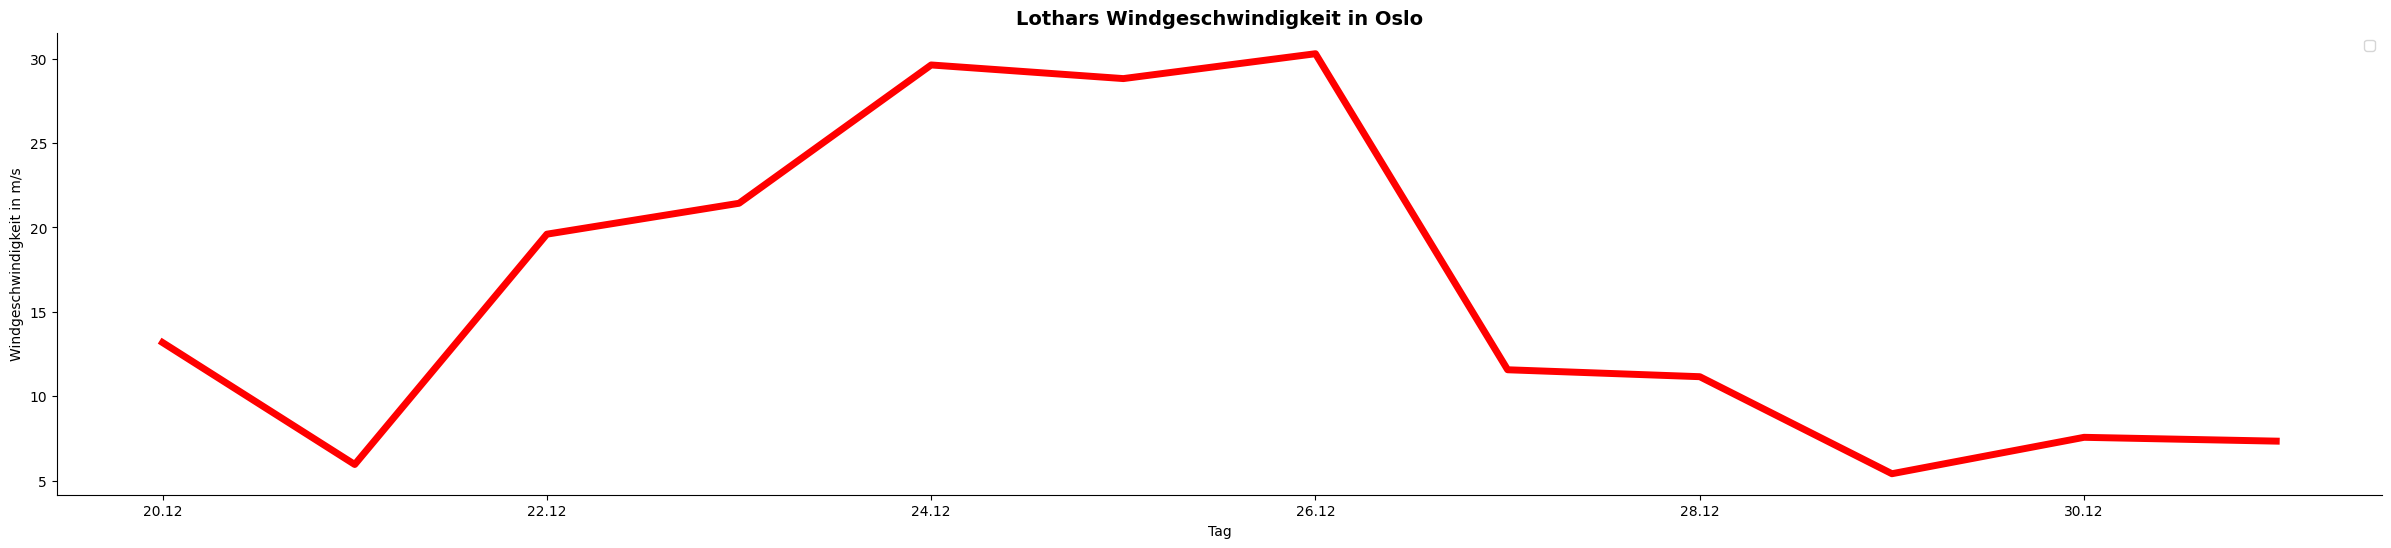

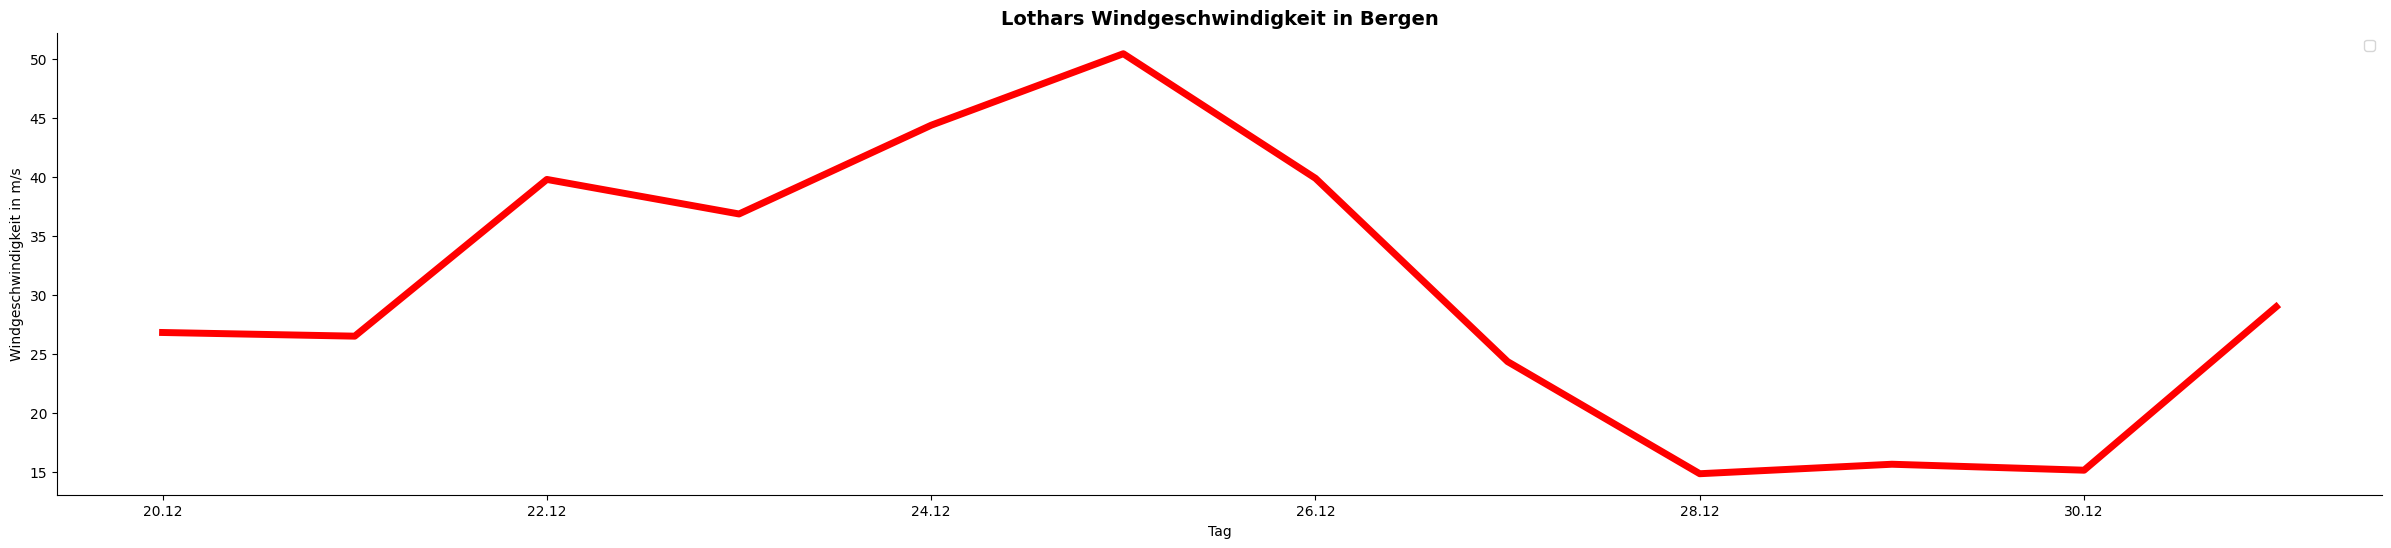

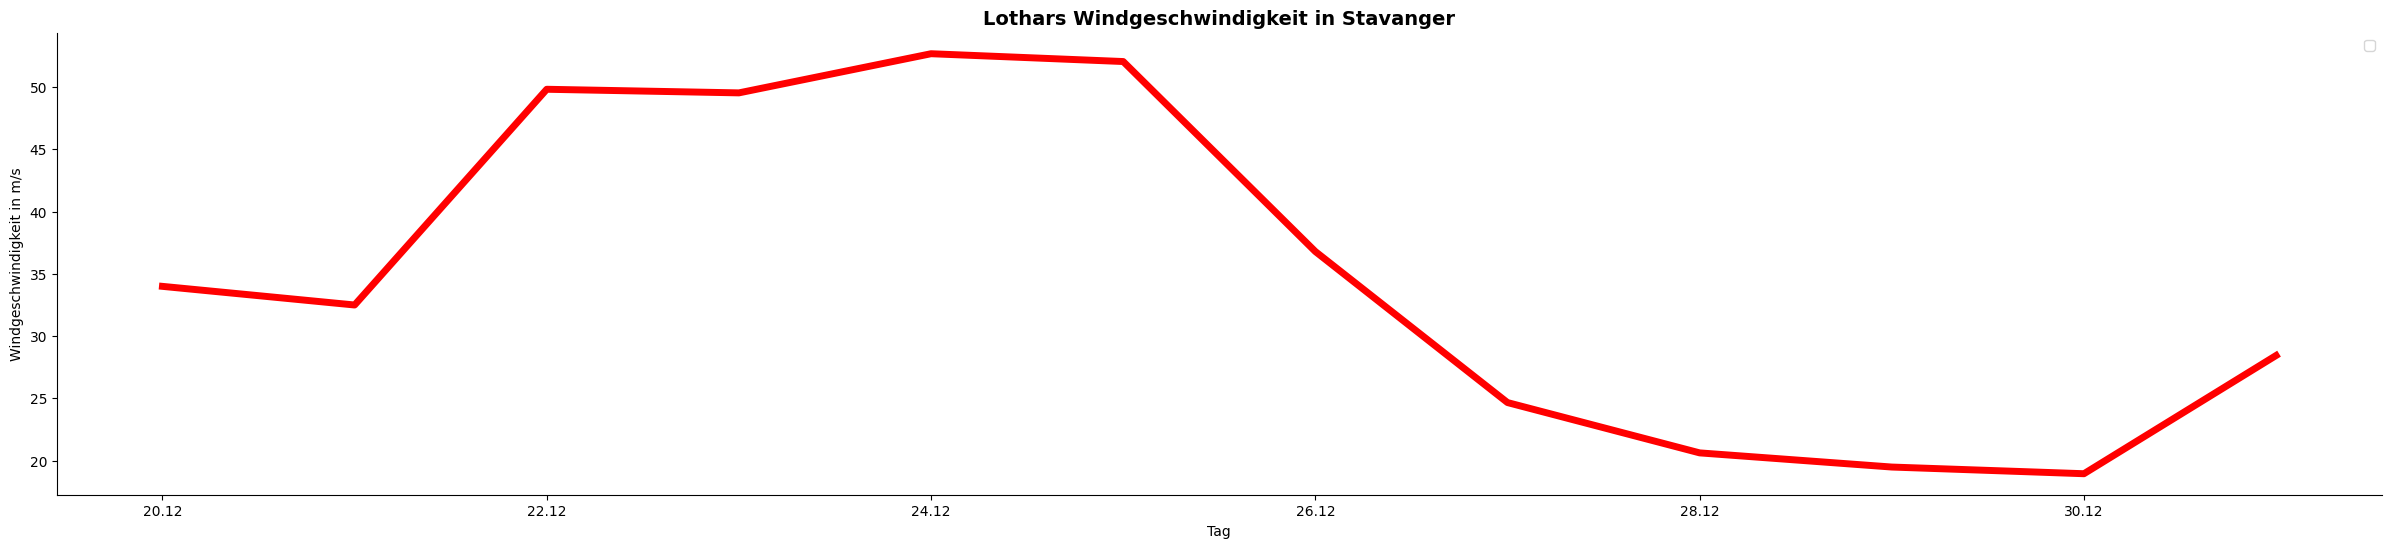

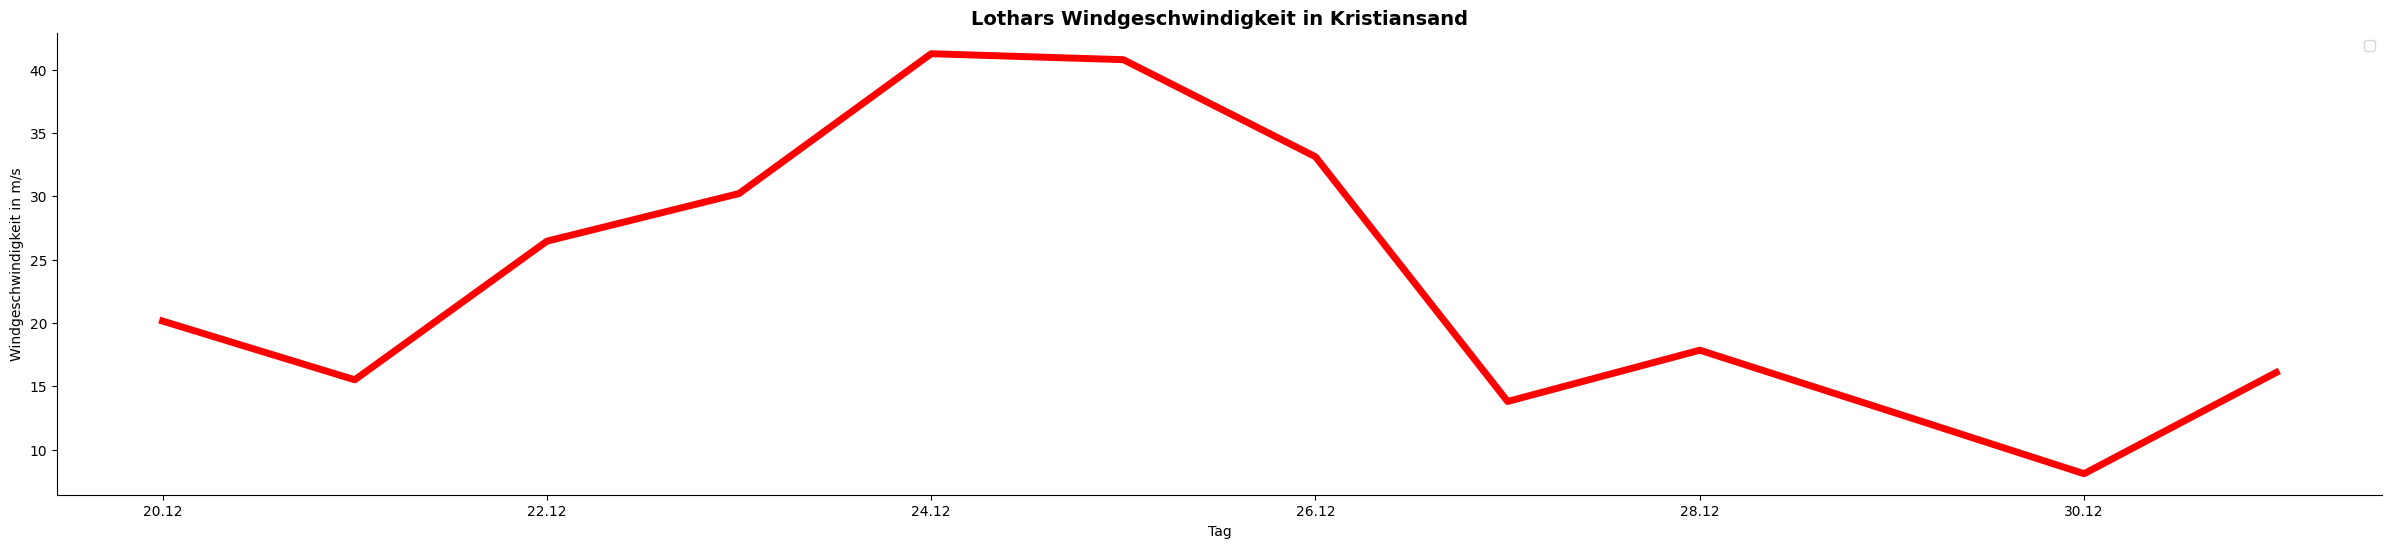

In [73]:
Oslo = {'lat': 59.9139, 'lon': 10.7522}
Bergen = {'lat': 60.3913, 'lon': 5.3221}
Stavanger = {'lat': 58.9699, 'lon': 5.7331}
Kristiansand = {'lat': 58.1464, 'lon': 7.9950}

Ortschaft(Oslo, "Oslo")
Ortschaft(Bergen, "Bergen")
Ortschaft(Stavanger, "Stavanger")
Ortschaft(Kristiansand, "Kristiansand")